### Importing the libraries

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

### Read in the dataset

In [3]:
inp0 = pd.read_csv(r'C:\Users\User\Downloads\Bank+Dataset\Bank Dataset\bank_marketing_updated_v1.csv')
inp0.head()

,banking marketing,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18
0,customer id and age.,NaN,Customer salary and balance.,NaN,Customer marital status and job with education...,NaN,particular customer before targeted or not,NaN,Loan types: loans or housing loans,NaN,Contact type,NaN,month of contact,duration of call,NaN,NaN,NaN,outcome of previous contact,response of customer after call happned
1,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
2,1,58,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
3,2,44,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
4,3,33,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no


### Data Cleaning

In [4]:
inp0 = pd.read_csv(r"C:\Users\User\Downloads\Bank+Dataset\Bank Dataset\bank_marketing_updated_v1.csv", skiprows = 2)
inp0.head()

,customerid,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,1,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,2,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,3,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,4,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,5,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dropping customerid column

In [5]:
inp0.drop('customerid', axis=1, inplace = True)
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no


#### Dividing jobedu into job and education

In [6]:
inp0['job']=inp0.jobedu.apply(lambda x: x.split(",")[0])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown


In [7]:
inp0['education']=inp0.jobedu.apply(lambda x: x.split(",")[1])
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### Drop jobedu column

In [8]:
inp0.reindex()
inp0.head()

,age,salary,balance,marital,jobedu,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,"management,tertiary",yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,"technician,secondary",yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,"entrepreneur,secondary",yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,"blue-collar,unknown",no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,"unknown,unknown",no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


In [9]:
inp0.drop('jobedu', axis = 1, inplace=True)
inp0.head()

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
0,58.0,100000,2143,married,yes,no,yes,no,unknown,5,"may, 2017",261 sec,1,-1,0,unknown,no,management,tertiary
1,44.0,60000,29,single,yes,no,yes,no,unknown,5,"may, 2017",151 sec,1,-1,0,unknown,no,technician,secondary
2,33.0,120000,2,married,yes,no,yes,yes,unknown,5,"may, 2017",76 sec,1,-1,0,unknown,no,entrepreneur,secondary
3,47.0,20000,1506,married,no,no,yes,no,unknown,5,"may, 2017",92 sec,1,-1,0,unknown,no,blue-collar,unknown
4,33.0,0,1,single,no,no,no,no,unknown,5,"may, 2017",198 sec,1,-1,0,unknown,no,unknown,unknown


#### Extract the value of month from the column 'month'

In [10]:
inp0['month_name']=inp0.month.apply(lambda x: x.split(",")[0])
inp0.head()

AttributeError: 'float' object has no attribute 'split'

In [11]:
inp0[inp0.month.apply(lambda x: isinstance(x, float)) ==True]

,age,salary,balance,marital,targeted,default,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,response,job,education
189,31.0,100000,0,single,no,no,yes,no,unknown,5,NaN,562 sec,1,-1,0,unknown,no,management,tertiary
769,39.0,20000,245,married,yes,no,yes,no,unknown,7,NaN,148 sec,3,-1,0,unknown,no,blue-collar,primary
860,33.0,55000,165,married,yes,no,no,no,unknown,7,NaN,111 sec,1,-1,0,unknown,no,retired,secondary
1267,36.0,50000,114,married,yes,no,yes,yes,unknown,8,NaN,147 sec,1,-1,0,unknown,no,admin.,secondary
1685,34.0,20000,457,married,yes,no,yes,no,unknown,9,NaN,266 sec,1,-1,0,unknown,no,blue-collar,secondary
1899,49.0,16000,164,divorced,yes,no,yes,no,unknown,9,NaN,1080 sec,5,-1,0,unknown,no,housemaid,primary
2433,26.0,60000,3825,married,yes,no,yes,no,unknown,13,NaN,107 sec,1,-1,0,unknown,no,technician,tertiary
2612,38.0,50000,446,single,no,no,yes,no,unknown,13,NaN,386 sec,1,-1,0,unknown,no,admin.,unknown
2747,48.0,120000,2550,married,no,no,yes,no,unknown,14,NaN,175 sec,3,-1,0,unknown,no,entrepreneur,unknown
3556,41.0,20000,59,married,yes,no,yes,no,unknown,15,NaN,75 sec,8,-1,0,unknown,no,blue-collar,secondary


#### Checking for missing values -

In [12]:
inp0.isnull().sum()

age          20
salary        0
balance       0
marital       0
targeted      0
default       0
housing       0
loan          0
contact       0
day           0
month        50
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
response     30
job           0
education     0
dtype: int64

#### Handling Missing Values

In [13]:
inp0.age.isnull().sum()

20

In [14]:
inp0.shape

(45211, 19)

In [15]:
float(100*20/45211)

0.04423702196368141

#### Drop Records with Age Missing

In [16]:
inp1 = inp0[~inp0.age.isnull()].copy()
inp1.shape

(45191, 19)

In [17]:
inp1.age.isnull().sum()

0

#### Handling missing values in months

In [18]:
inp1.month.isnull().sum()

50

In [19]:
inp1.month.value_counts(normalize=True)

may, 2017    0.304380
jul, 2017    0.152522
aug, 2017    0.138123
jun, 2017    0.118141
nov, 2017    0.087880
apr, 2017    0.064908
feb, 2017    0.058616
jan, 2017    0.031058
oct, 2017    0.016327
sep, 2017    0.012760
mar, 2017    0.010545
dec, 2017    0.004741
Name: month, dtype: float64

In [20]:
inp1.month.mode()

0    may, 2017
dtype: object

In [21]:
month_mode=inp1.month.mode()[0]
month_mode

'may, 2017'

In [22]:
inp1.month.fillna(month_mode, inplace=True)
inp1.month.value_counts(normalize=True)

may, 2017    0.305149
jul, 2017    0.152353
aug, 2017    0.137970
jun, 2017    0.118010
nov, 2017    0.087783
apr, 2017    0.064836
feb, 2017    0.058551
jan, 2017    0.031024
oct, 2017    0.016309
sep, 2017    0.012746
mar, 2017    0.010533
dec, 2017    0.004735
Name: month, dtype: float64

In [23]:
inp1.month.isnull().sum()

0

In [24]:
inp1.pdays.describe()

count    45191.000000
mean        40.181253
std        100.074099
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

#### -1 indicates missing values !!!

#### How do we handle this?
#### Remember our objective!
- we want the missing value to be ignored in the calculations
- simply make it missing and replace -1 with NaN
- all summary statistics - mean, median etc will ignore the missing values

In [25]:
inp1.loc[inp1.pdays<0, "pdays"] = np.NaN
inp1.pdays.describe()

count    8252.000000
mean      224.523752
std       115.202715
min         1.000000
25%       133.000000
50%       194.500000
75%       327.000000
max       871.000000
Name: pdays, dtype: float64

#### Missing value doesn't always have to be present as null!

In [26]:
inp1 = inp0[~inp0.response.isnull()].copy()

In [27]:
inp1.response.isnull().sum()

0

In [28]:
inp0.shape[0]

45211

In [29]:
inp1.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

In [30]:
float(100.0*(inp0.response.isnull().sum())/(inp0.shape[0]))

0.06635553294552211

In [31]:
inp0.response.isnull().sum()

30

#### Outlier Handling

#### Age Variable

In [32]:
inp1.age.describe()

count    45161.000000
mean        40.935763
std         10.618790
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

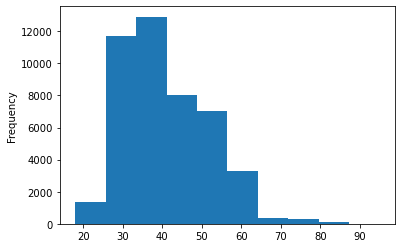

In [33]:
inp1.age.plot.hist()
plt.show()

<AxesSubplot:xlabel='age'>

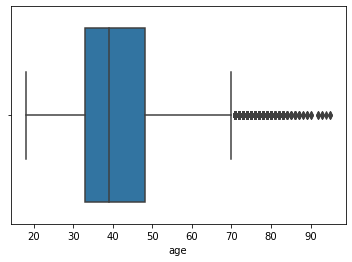

In [34]:
sns.boxplot(inp1.age)

#### Balance Variable

In [35]:
inp1.balance.describe()

count     45181.000000
mean       1362.689936
std        3045.584521
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

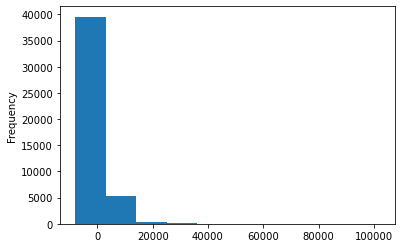

In [36]:
inp1.balance.plot.hist()
plt.show()

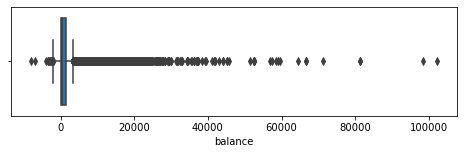

In [37]:
plt.figure(figsize=[8,2])
sns.boxplot(inp1.balance)
plt.show()

In [38]:
inp1.balance.quantile([0.5,0.7,0.9,0.95,0.99])

0.50      448.0
0.70     1126.0
0.90     3575.0
0.95     5769.0
0.99    13169.2
Name: balance, dtype: float64

In [39]:
inp1[inp1.balance>15000].describe()

,age,salary,balance,day,campaign,pdays,previous
count,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000,351.000000
mean,45.341880,70008.547009,24295.780627,16.022792,2.749288,32.475783,0.555556
std,12.114333,34378.272805,12128.560693,8.101819,3.036886,87.738924,1.784590
min,23.000000,0.000000,15030.000000,1.000000,1.000000,-1.000000,0.000000
25%,35.000000,50000.000000,17074.000000,9.000000,1.000000,-1.000000,0.000000
50%,44.000000,60000.000000,20723.000000,18.000000,2.000000,-1.000000,0.000000
75%,55.000000,100000.000000,26254.000000,21.000000,3.000000,-1.000000,0.000000
max,84.000000,120000.000000,102127.000000,31.000000,31.000000,589.000000,23.000000


#### Instead of looking at mean, we could look at quantiles/medians/percentiles instead

### Standardize Variable

#### Duration Variable

In [40]:
inp1.duration.head(10)

0    261 sec
1    151 sec
2     76 sec
3     92 sec
4    198 sec
5    139 sec
6    217 sec
7    380 sec
8     50 sec
9     55 sec
Name: duration, dtype: object

In [41]:
inp1.duration.describe()

count       45181
unique       2646
top       1.5 min
freq          138
Name: duration, dtype: object

In [42]:
inp1.duration[:5].apply(lambda x: float(x.split()[0])/60 if x.find("sec")>0 else float(x.split()[0]))

0    4.350000
1    2.516667
2    1.266667
3    1.533333
4    3.300000
Name: duration, dtype: float64

In [43]:
inp1.dtypes

age          float64
salary         int64
balance        int64
marital       object
targeted      object
default       object
housing       object
loan          object
contact       object
day            int64
month         object
duration      object
campaign       int64
pdays          int64
previous       int64
poutcome      object
response      object
job           object
education     object
dtype: object

## Univariate Analysis Categorical Features
#### Marital

In [44]:
inp1.marital.value_counts()

married     27195
single      12782
divorced     5204
Name: marital, dtype: int64

In [45]:
inp1.marital.value_counts(normalize = True)

married     0.601912
single      0.282907
divorced    0.115181
Name: marital, dtype: float64

<AxesSubplot:>

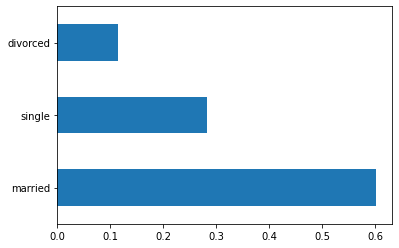

In [46]:
inp1.marital.value_counts(normalize = True).plot.barh()

In [47]:
inp1.job.value_counts(normalize = True)

blue-collar      0.215290
management       0.209247
technician       0.168035
admin.           0.114340
services         0.091853
retired          0.050087
self-employed    0.034860
entrepreneur     0.032890
unemployed       0.028840
housemaid        0.027423
student          0.020761
unknown          0.006374
Name: job, dtype: float64

<AxesSubplot:>

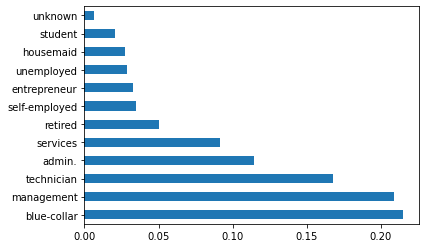

In [48]:
inp1.job.value_counts(normalize = True).plot.barh()

#### Education Variable

In [49]:
inp1.education.value_counts()

secondary    23189
tertiary     13292
primary       6844
unknown       1856
Name: education, dtype: int64

<AxesSubplot:>

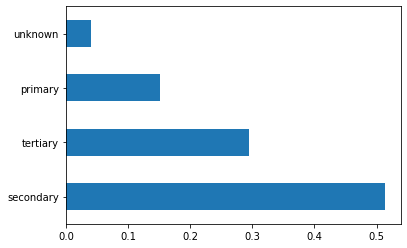

In [50]:
inp1.education.value_counts(normalize=True).plot.barh()

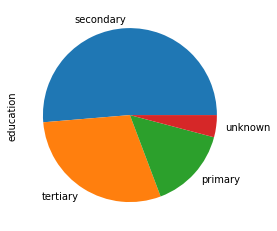

In [51]:
inp1.education.value_counts(normalize=True).plot.pie()
plt.show()

#### poutcome variable

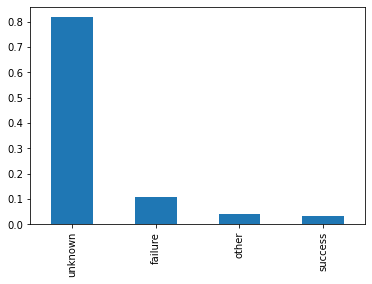

In [52]:
inp1.poutcome.value_counts(normalize=True).plot.bar()
plt.show()

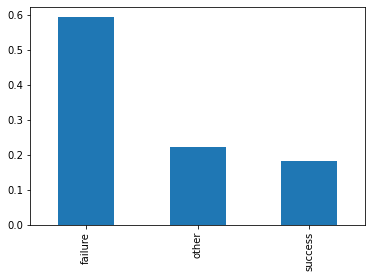

In [53]:
inp1[~(inp1.poutcome=='unknown')].poutcome.value_counts(normalize=True).plot.bar()
plt.show()

#### response - the target variable

In [54]:
inp1.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

<AxesSubplot:>

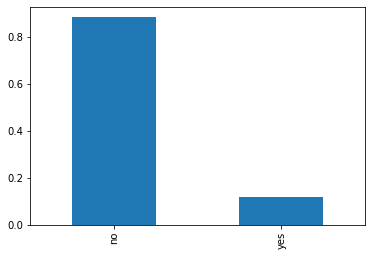

In [55]:
inp1.response.value_counts(normalize=True).plot.bar()

<AxesSubplot:ylabel='response'>

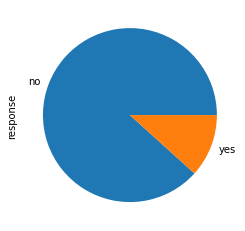

In [56]:
inp1.response.value_counts(normalize=True).plot.pie()

## Bivariate Analysis

### Numerical-Numerical Analysis

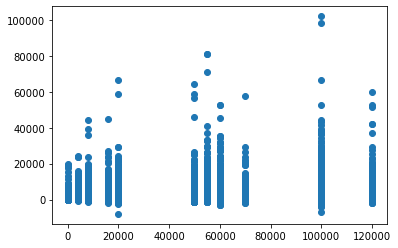

In [57]:
plt.scatter(inp1.salary, inp1.balance)
plt.show()

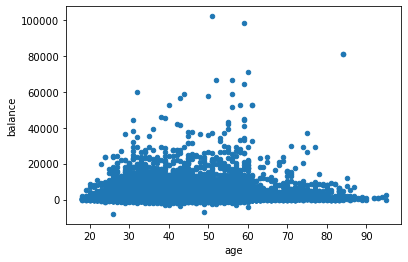

In [58]:
inp1.plot.scatter(x="age", y="balance")
plt.show()

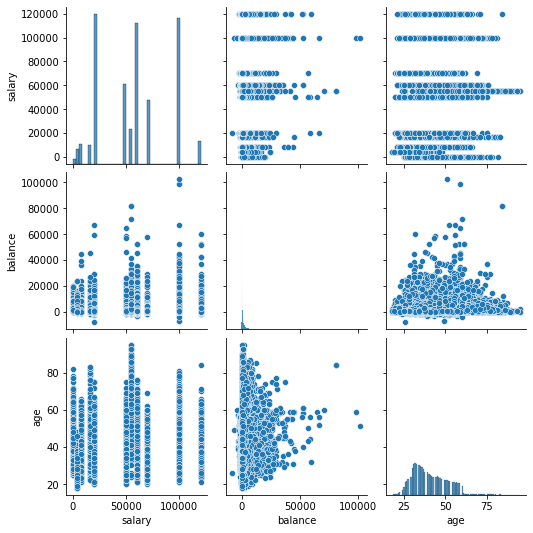

In [59]:
sns.pairplot(data=inp1, vars=["salary", "balance", "age"])
plt.show()

#### Quantify using correlation values

In [60]:
inp1[["age","balance","salary"]].corr()

,age,balance,salary
age,1.000000,0.097710,0.024513
balance,0.097710,1.000000,0.055453
salary,0.024513,0.055453,1.000000


#### Correlation Heat Map

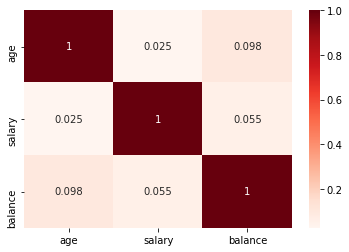

In [61]:
sns.heatmap(inp1[["age","salary","balance"]].corr(), annot=True, cmap="Reds")
plt.show()

#### Categorical to numerical

In [62]:
inp1.groupby('response')['salary'].mean()

response
no     56770.917933
yes    58771.704180
Name: salary, dtype: float64

In [63]:
inp1.groupby('response')['salary'].median()

response
no     60000
yes    60000
Name: salary, dtype: int64

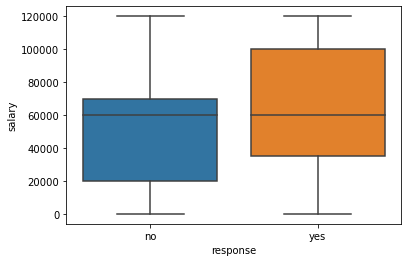

In [64]:
sns.boxplot(data=inp1, x='response', y='salary')
plt.show()

#### Response vs Balance
- we know that balance is highly skewed - has very high values!

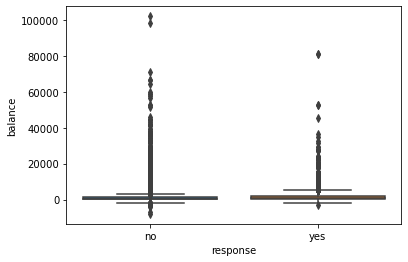

In [65]:
sns.boxplot(data=inp1, x='response', y='balance')
plt.show()

In [66]:
inp1.groupby('response')['balance'].mean()

response
no     1304.094525
yes    1804.832041
Name: balance, dtype: float64

In [67]:
inp1.groupby('response')['balance'].median()

response
no     417
yes    733
Name: balance, dtype: int64

#### 75th Percentile

In [68]:
 def p75(x):
        return np.quantile(x,0.75)

In [69]:
inp1.groupby('response')['balance'].aggregate(["mean","median",p75])

,mean,median,p75
response,,,
no,1304.094525,417,1345.0
yes,1804.832041,733,2159.5


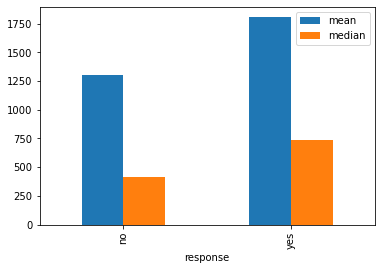

In [70]:
inp1.groupby('response')['balance'].aggregate(["mean","median"]).plot.bar()
plt.show()

In [71]:
inp1.groupby('education')['salary'].mean()

education
primary      34220.192870
secondary    49739.143559
tertiary     82875.564249
unknown      46529.633621
Name: salary, dtype: float64

In [72]:
inp1.groupby('education')['salary'].median()

education
primary       20000
secondary     55000
tertiary     100000
unknown       50000
Name: salary, dtype: int64

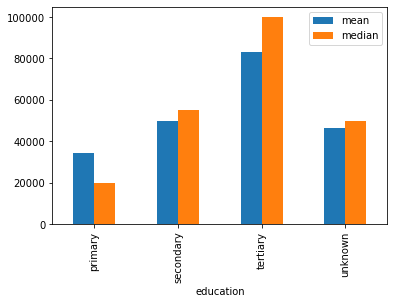

In [73]:
inp1.groupby('education')['salary'].aggregate(["mean","median"]).plot.bar()
plt.show()

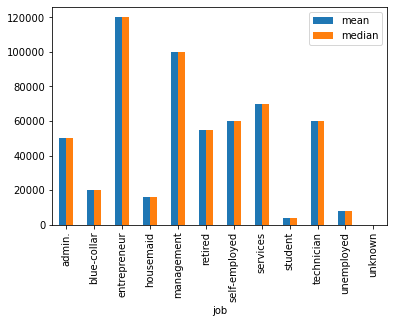

In [74]:
inp1.groupby('job')['salary'].aggregate(["mean","median"]).plot.bar()
plt.show()

#### Categorical-Categorical Analysis

In [75]:
inp1['response_flag']=np.where(inp1.response=="yes",1,0)

In [76]:
inp1.response_flag.value_counts()

0    39894
1     5287
Name: response_flag, dtype: int64

In [77]:
inp1.response.value_counts()

no     39894
yes     5287
Name: response, dtype: int64

In [78]:
inp1.response.value_counts(normalize=True)

no     0.882982
yes    0.117018
Name: response, dtype: float64

In [79]:
inp1.response_flag.mean()

0.11701821562161085

#### Education vs Reponse rate

In [80]:
inp1.groupby('education')['response_flag'].mean()

education
primary      0.086353
secondary    0.105610
tertiary     0.150090
unknown      0.135776
Name: response_flag, dtype: float64

#### Marital vs Response Rate

education
primary      AxesSubplot(0.125,0.125;0.775x0.755)
secondary    AxesSubplot(0.125,0.125;0.775x0.755)
tertiary     AxesSubplot(0.125,0.125;0.775x0.755)
unknown      AxesSubplot(0.125,0.125;0.775x0.755)
Name: response_flag, dtype: object

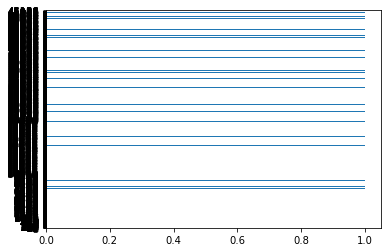

In [81]:
inp1.groupby('education')['response_flag'].plot.barh()

In [82]:
inp1.groupby('marital')['response_flag'].mean()

marital
divorced    0.119523
married     0.101269
single      0.149507
Name: response_flag, dtype: float64

<AxesSubplot:ylabel='marital'>

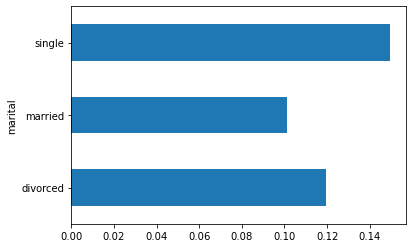

In [83]:
inp1.groupby('marital')['response_flag'].mean().plot.barh()

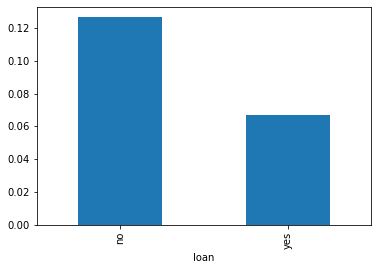

In [84]:
inp1.groupby('loan')['response_flag'].mean().plot.bar()
plt.show()

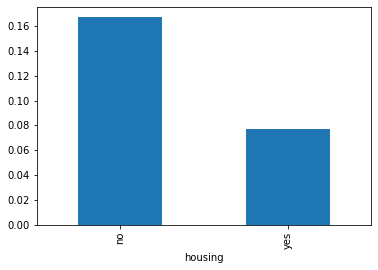

In [85]:
inp1.groupby('housing')['response_flag'].mean().plot.bar()
plt.show()

#### Age vs Response Rate

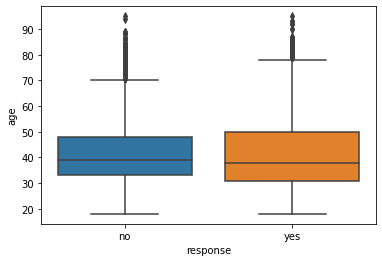

In [86]:
sns.boxplot(data=inp1, x="response",y="age")
plt.show()

#### Making buckets from the age column

In [87]:
?pd.cut

In [88]:
pd.cut(inp1.age[:5], [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

0    50-60
1    40-50
2    30-40
3    40-50
4    30-40
Name: age, dtype: category
Categories (5, object): ['<30' < '30-40' < '40-50' < '50-60' < '60+']

In [89]:
inp1.age.head()

0    58.0
1    44.0
2    33.0
3    47.0
4    33.0
Name: age, dtype: float64

In [90]:
inp1["age_group"]=pd.cut(inp1.age, [0,30,40,50,60,9999], labels=["<30","30-40","40-50","50-60","60+"])

In [91]:
inp1.age_group.value_counts(normalize=True)

30-40    0.391090
40-50    0.248688
50-60    0.178406
<30      0.155555
60+      0.026262
Name: age_group, dtype: float64

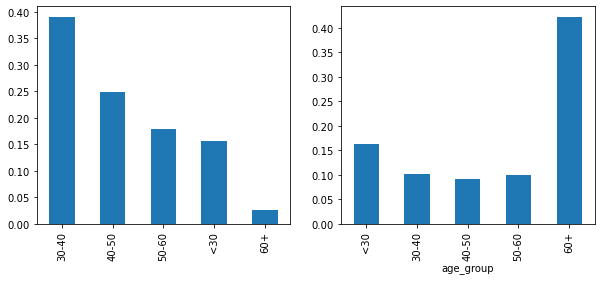

In [92]:
plt.figure(figsize=[10,4])
plt.subplot(1,2,1)
inp1.age_group.value_counts(normalize=True).plot.bar()
plt.subplot(1,2,2)
inp1.groupby(['age_group'])['response_flag'].mean().plot.bar()
plt.show()

<AxesSubplot:ylabel='job'>

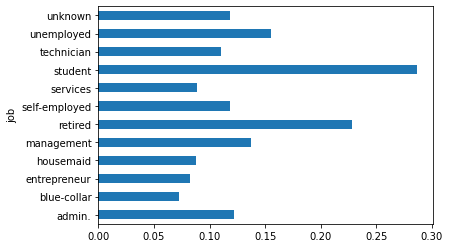

In [93]:
inp1.groupby('job')['response_flag'].mean().plot.barh()

<AxesSubplot:xlabel='job'>

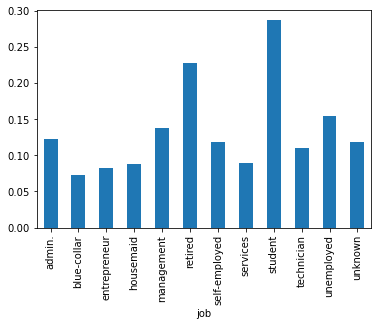

In [94]:
inp1.groupby('job')['response_flag'].mean().plot.bar()

<AxesSubplot:ylabel='education'>

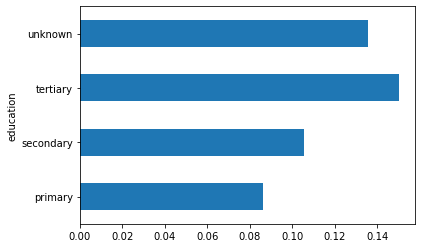

In [95]:
inp1.groupby('education')['response_flag'].mean().plot.barh()

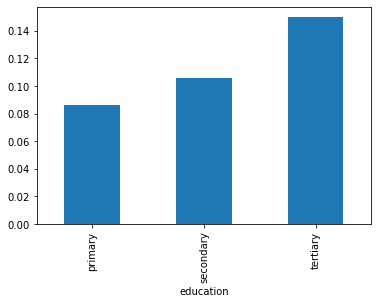

In [96]:
inp1[~(inp1.education=='unknown')].groupby('education')['response_flag'].mean().plot.bar()
plt.show()

<AxesSubplot:ylabel='job'>

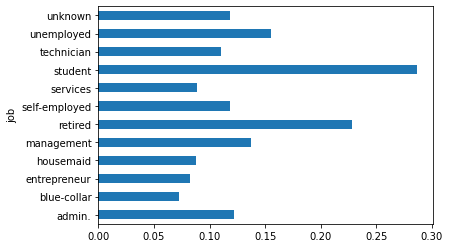

In [97]:
inp1.groupby('job')['response_flag'].mean().plot.barh()

<AxesSubplot:ylabel='response_flag'>

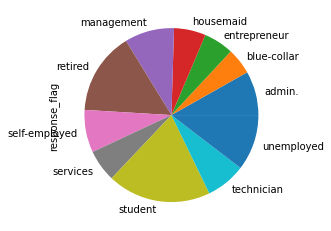

In [98]:
inp1[~(inp1.job=='unknown')].groupby('job')['response_flag'].mean().plot.pie()

<AxesSubplot:xlabel='job'>

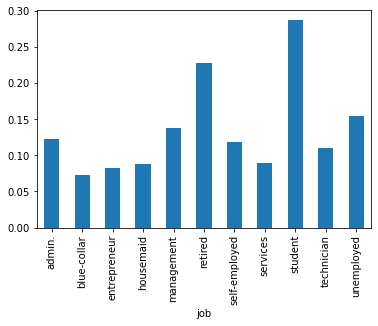

In [99]:
inp1[~(inp1.job=='unknown')].groupby('job')['response_flag'].mean().plot.bar()

<AxesSubplot:ylabel='job'>

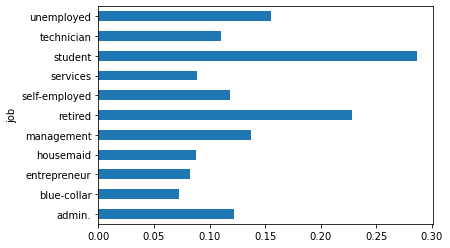

In [100]:
inp1[~(inp1.job=='unknown')].groupby('job')['response_flag'].mean().plot.barh()

In [101]:
inp1[~(inp1.job=='unknown')].value_counts().mean()

1.0

In [102]:
inp1[~(inp1.job=='unknown')]['job'].describe()

count           44893
unique             11
top       blue-collar
freq             9727
Name: job, dtype: object

In [103]:
inp1[~(inp1.job=='unknown')].job.value_counts(normalize=True)

blue-collar      0.216671
management       0.210590
technician       0.169113
admin.           0.115074
services         0.092442
retired          0.050409
self-employed    0.035083
entrepreneur     0.033101
unemployed       0.029025
housemaid        0.027599
student          0.020894
Name: job, dtype: float64

In [104]:
inp1[~(inp1.education=='unknown')].education.value_counts(normalize=True)

secondary    0.535234
tertiary     0.306797
primary      0.157969
Name: education, dtype: float64

In [105]:
inp1.groupby('job')['response_flag'].mean()

job
admin.           0.121951
blue-collar      0.072787
entrepreneur     0.082773
housemaid        0.087974
management       0.137614
retired          0.228016
self-employed    0.118095
services         0.088916
student          0.286780
technician       0.110643
unemployed       0.155027
unknown          0.118056
Name: response_flag, dtype: float64

<AxesSubplot:ylabel='job'>

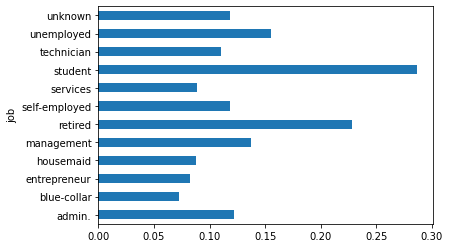

In [106]:
inp1.groupby('job')['response_flag'].mean().plot.barh()

#### More than 2 Variables

### Education vs Marital vs Response

In [107]:
res1 = pd.pivot_table(data=inp1, index="education", columns = "marital", values = "response_flag")
res1

marital,divorced,married,single
education,,,
primary,0.138482,0.075573,0.106682
secondary,0.103448,0.094681,0.129271
tertiary,0.138001,0.129798,0.183622
unknown,0.142012,0.122519,0.162879


<AxesSubplot:xlabel='marital', ylabel='education'>

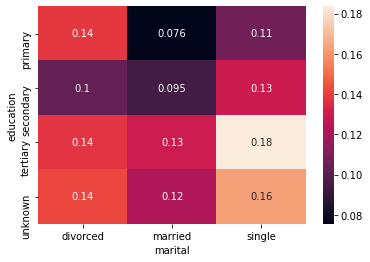

In [108]:
sns.heatmap(res1, annot=True)

<AxesSubplot:xlabel='marital', ylabel='education'>

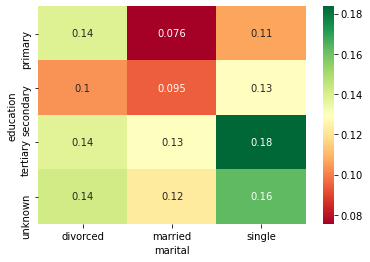

In [109]:
sns.heatmap(res1, annot=True, cmap="RdYlGn")

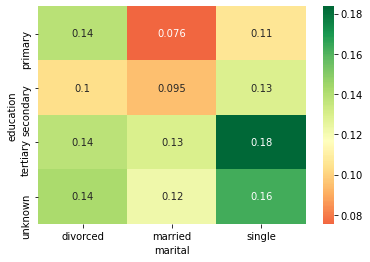

In [110]:
sns.heatmap(res1, annot=True, cmap="RdYlGn", center = 0.117)
plt.show()

### Job vs Marital vs Response

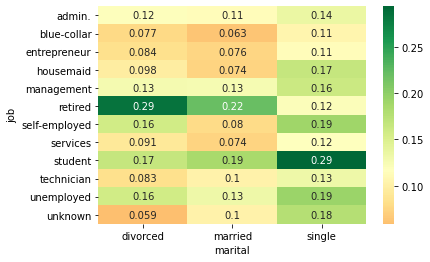

In [111]:
res2 = pd.pivot_table(data=inp1, index="job", columns = "marital", values = "response_flag")
sns.heatmap(res2, annot=True, cmap="RdYlGn", center = 0.117)
plt.show()

### Job vs Poutcome vs Response

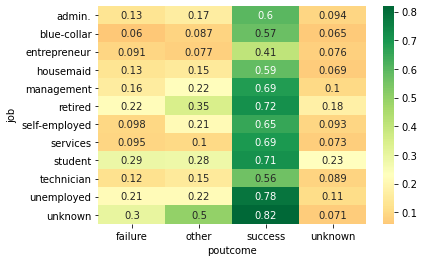

In [112]:
res3= pd.pivot_table(data=inp1, index="job", columns = "poutcome", values = "response_flag")
sns.heatmap(res3, annot=True, cmap="RdYlGn", center = 0.2308)
plt.show()

### Education vs Poutcome vs Reponse

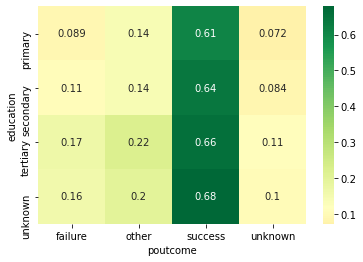

In [113]:
res4 = pd.pivot_table(data=inp1, index="education", columns = "poutcome", values = "response_flag")
sns.heatmap(res4, annot=True, cmap="RdYlGn", center = 0.117)
plt.show()

In [114]:
inp1[inp1.pdays>0].response_flag.mean()

0.23088110532056721

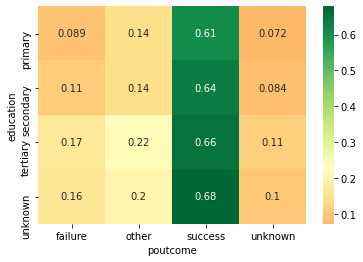

In [115]:
res5 = pd.pivot_table(data=inp1, index="education", columns = "poutcome", values = "response_flag")
sns.heatmap(res5, annot=True, cmap="RdYlGn", center = 0.2308)
plt.show()

### Marital vs Age vs Response

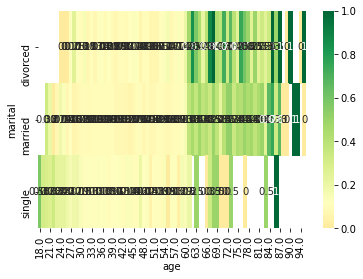

In [116]:
res6 = pd.pivot_table(data=inp1, index="marital", columns = "age", values = "response_flag")
sns.heatmap(res6, annot=True, cmap="RdYlGn", center = 0.117)
plt.show()